## Data Handling and Cleaning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import datetime

In [2]:
df=pd.read_csv('USvideos.csv')
df.shape

(40949, 16)

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df=df.drop_duplicates()
df.shape

(40901, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  descrip

In [8]:
columns_to_remove=['thumbnail_link', 'description']
df=df.drop(columns=columns_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB


In [9]:
df['trending_date']=df['trending_date'].apply(lambda x : datetime.datetime.strptime(x, '%y.%d.%m'))
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [10]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False


In [11]:
df['video_index'] = df.index
df['publish_year'] = df['publish_time'].dt.year
df['publish_month']=df['publish_time'].dt.month
df['publish_day']=df['publish_time'].dt.day
df['publish_hour']=df['publish_time'].dt.hour
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_index,publish_year,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,0,2017,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,1,2017,11,13,7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40901 non-null  object             
 1   trending_date           40901 non-null  datetime64[ns]     
 2   title                   40901 non-null  object             
 3   channel_title           40901 non-null  object             
 4   category_id             40901 non-null  int64              
 5   publish_time            40901 non-null  datetime64[ns, UTC]
 6   tags                    40901 non-null  object             
 7   views                   40901 non-null  int64              
 8   likes                   40901 non-null  int64              
 9   dislikes                40901 non-null  int64              
 10  comment_count           40901 non-null  int64              
 11  comments_disabled       40901 non-null  bool  

In [13]:
sorted(df['category_id'].unique())

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]

In [14]:
df['category_name']=np.nan
df['category_name'] = df['category_name'].astype(object)
df.loc[(df['category_id']==1),'category_name'] = 'Film and Animation'
df.loc[(df['category_id']==2),'category_name'] = 'Autos and Vehicles'
df.loc[(df['category_id']==10),'category_name'] = 'Music'
df.loc[(df['category_id']==15),'category_name'] = 'Pets and Animals'
df.loc[(df['category_id']==17),'category_name'] = 'Sports'
df.loc[(df['category_id']==19),'category_name'] = 'Travel and Events'
df.loc[(df['category_id']==20),'category_name'] = 'Gaming'
df.loc[(df['category_id']==22),'category_name'] = 'People and Blog'
df.loc[(df['category_id']==23),'category_name'] = 'Comedy'
df.loc[(df['category_id']==24),'category_name'] = 'Entertainment'
df.loc[(df['category_id']==25),'category_name'] = 'News and Politics'
df.loc[(df['category_id']==26),'category_name'] = 'How to and Style'
df.loc[(df['category_id']==27),'category_name'] = 'Education'
df.loc[(df['category_id']==28),'category_name'] = 'Science and Technology'
df.loc[(df['category_id']==29),'category_name'] = 'Non-Profit and Activities'
df.loc[(df['category_id']==43),'category_name'] = 'Shows'
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_index,publish_year,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,0,2017,11,13,17,People and Blog
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,1,2017,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2,2017,11,12,19,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,3,2017,11,13,11,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,4,2017,11,12,18,Entertainment


## Data Visualization

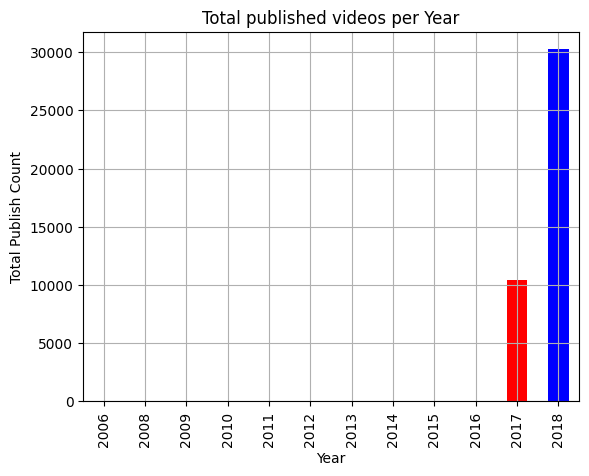

In [15]:
df['year']=df['publish_time'].dt.year
yearly_counts=df.groupby('year')['video_id'].count()
colors = ['red', 'blue', 'green', 'purple', 'orange']
yearly_counts.plot(kind='bar', xlabel='Year', ylabel='Total Publish Count', title='Total published videos per Year',color=colors)
plt.grid(True)
plt.show()

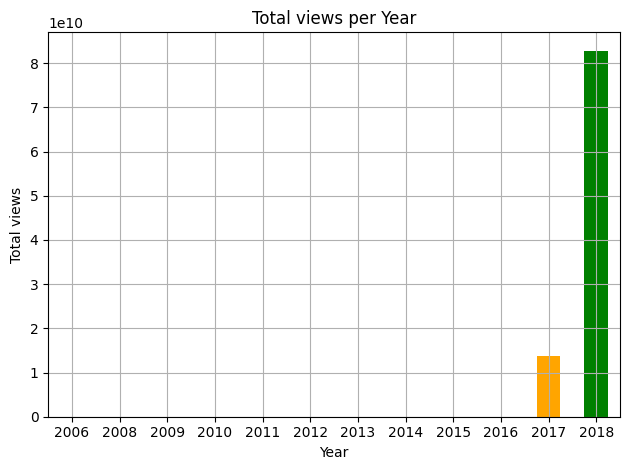

In [16]:
yearly_views=df.groupby('year')['views'].sum()
colors = ['orange','green']
yearly_views.plot(kind='bar', xlabel='Year', ylabel='Total views', title='Total views per Year', color=colors)
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

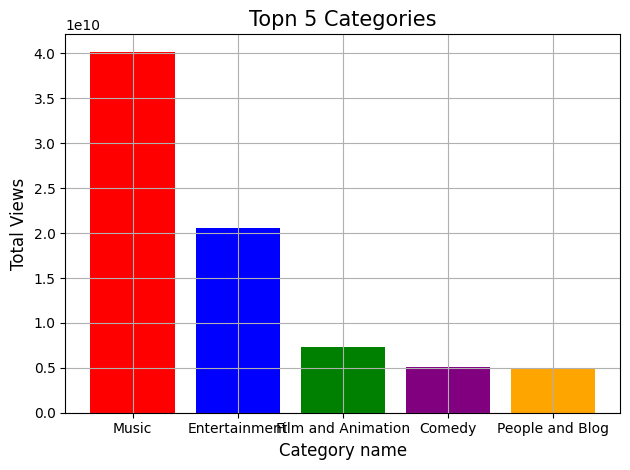

In [17]:
category_views=df.groupby('category_name')['views'].sum().reset_index()
top_categories=category_views.sort_values(by='views', ascending=False).head(5)
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.bar(top_categories['category_name'], top_categories['views'],color=colors)
plt.xlabel('Category name', fontsize=12)
plt.ylabel('Total Views', fontsize=12)
plt.title('Topn 5 Categories', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()

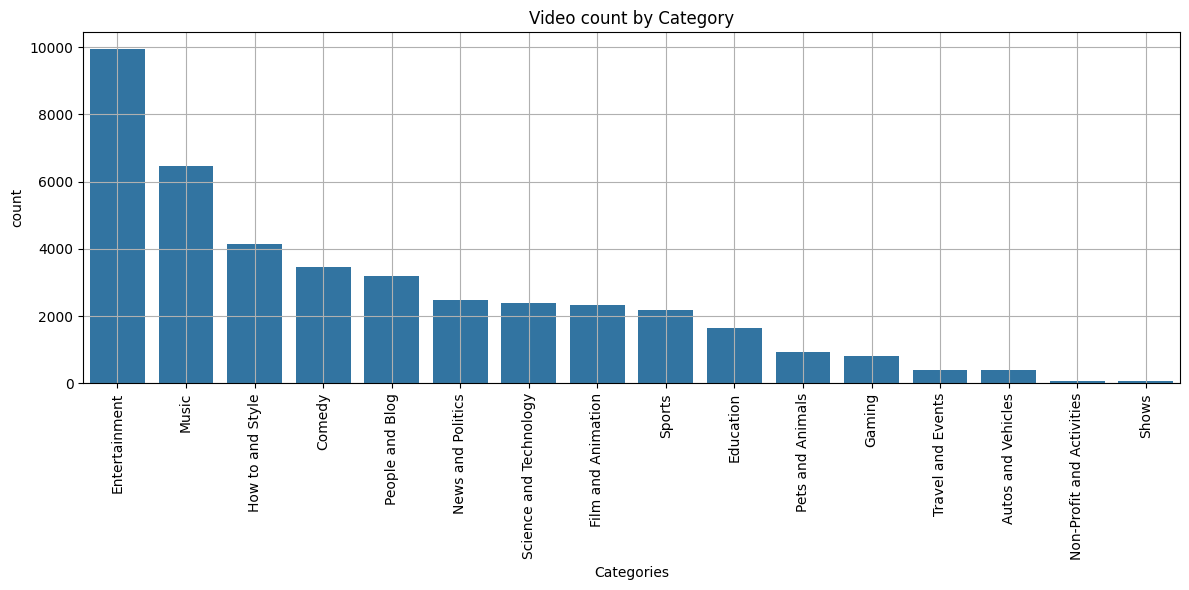

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, order=df['category_name'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.title('Video count by Category')
plt.grid(True)
plt.tight_layout()
plt.show()

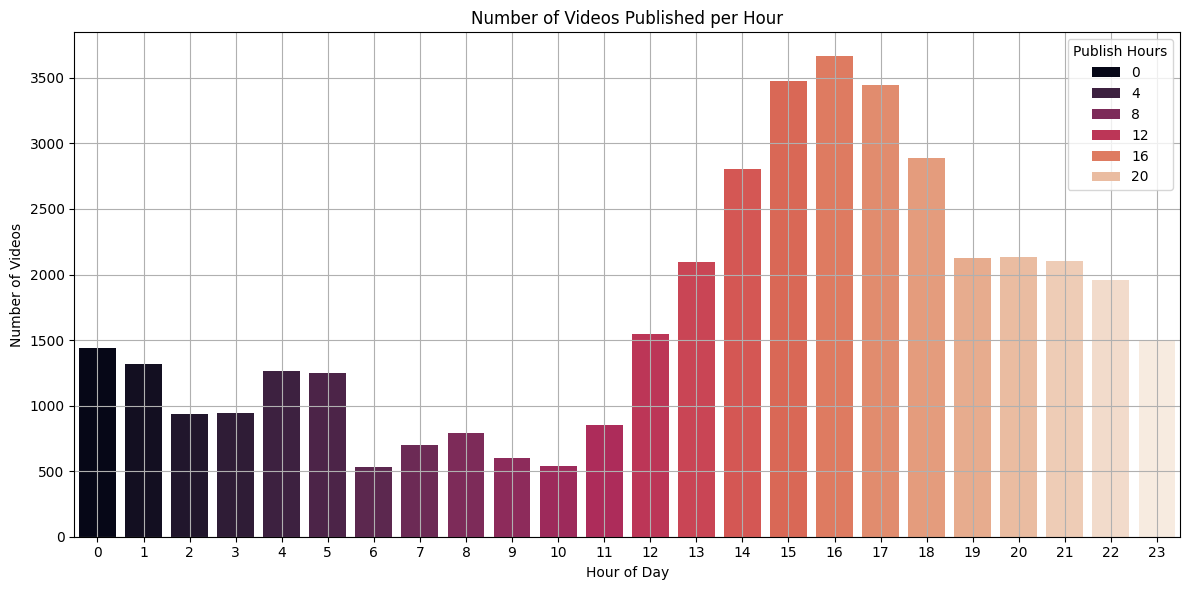

In [19]:
videos_per_hour=df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, hue=videos_per_hour.index, palette='rocket', legend=True)
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
ax.legend(title='Publish Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

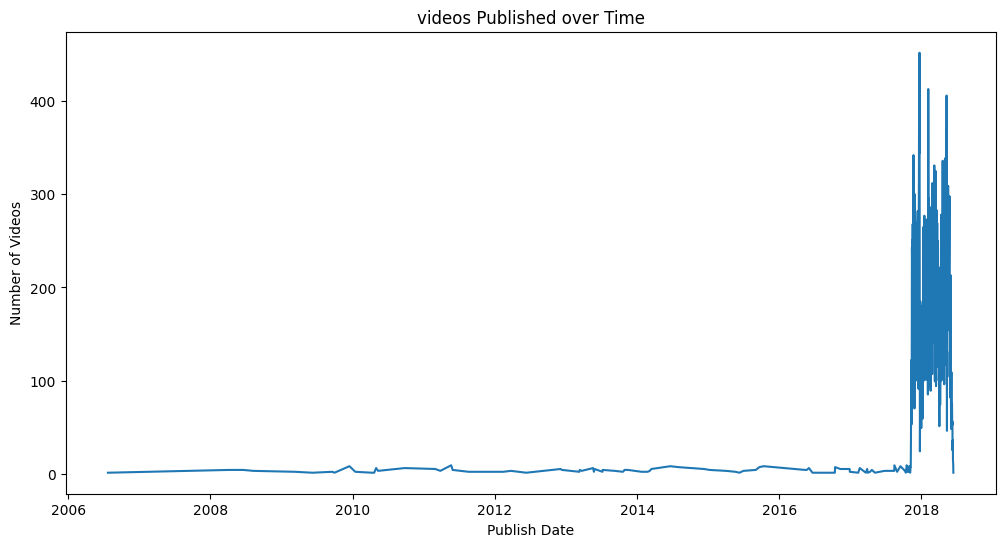

In [20]:
df['publish_time']=pd.to_datetime(df['publish_time'])
df['publish_date']=df['publish_time'].dt.date
video_count_by_date=df.groupby('publish_date').size()
plt.figure(figsize=(12,6))
sns.lineplot(data=video_count_by_date)
plt.title('videos Published over Time')
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')

plt.show()

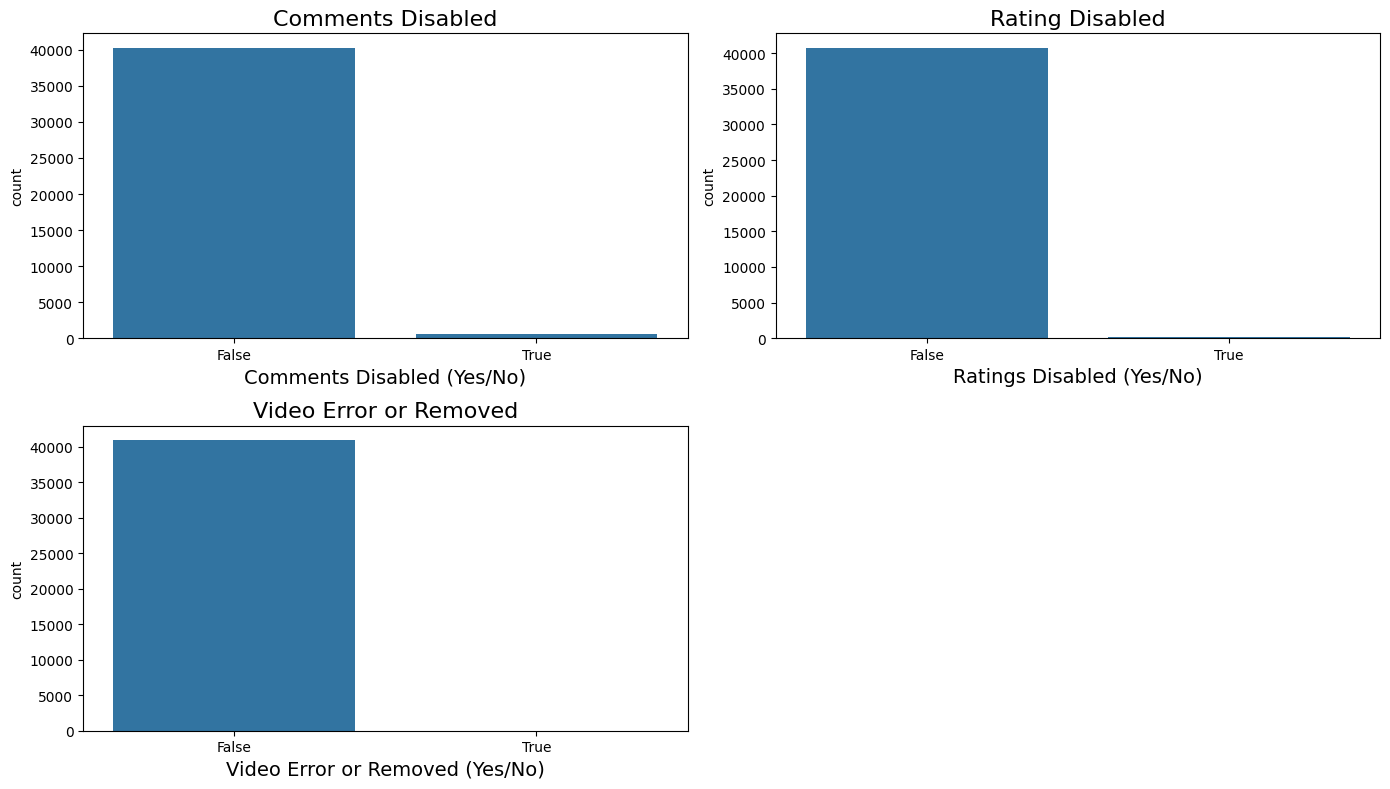

In [24]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(wspace=0.2, hspace=0.4, top=0.9)
plt.subplot(2,2,1)
g=sns.countplot(x='comments_disabled', data=df)
g.set_title('Comments Disabled', fontsize=16)
g.set_xlabel('Comments Disabled (Yes/No)', fontsize=14)
plt.subplot(2,2,2)
g1=sns.countplot(x='ratings_disabled', data=df)
g1.set_title('Rating Disabled', fontsize=16)
g1.set_xlabel('Ratings Disabled (Yes/No)', fontsize=14)
plt.subplot(2,2,3)
g2=sns.countplot(x='video_error_or_removed', data=df)
g2.set_xlabel('Video Error or Removed (Yes/No)', fontsize=14)
g2.set_title('Video Error or Removed', fontsize=16)
plt.tight_layout()
plt.show()

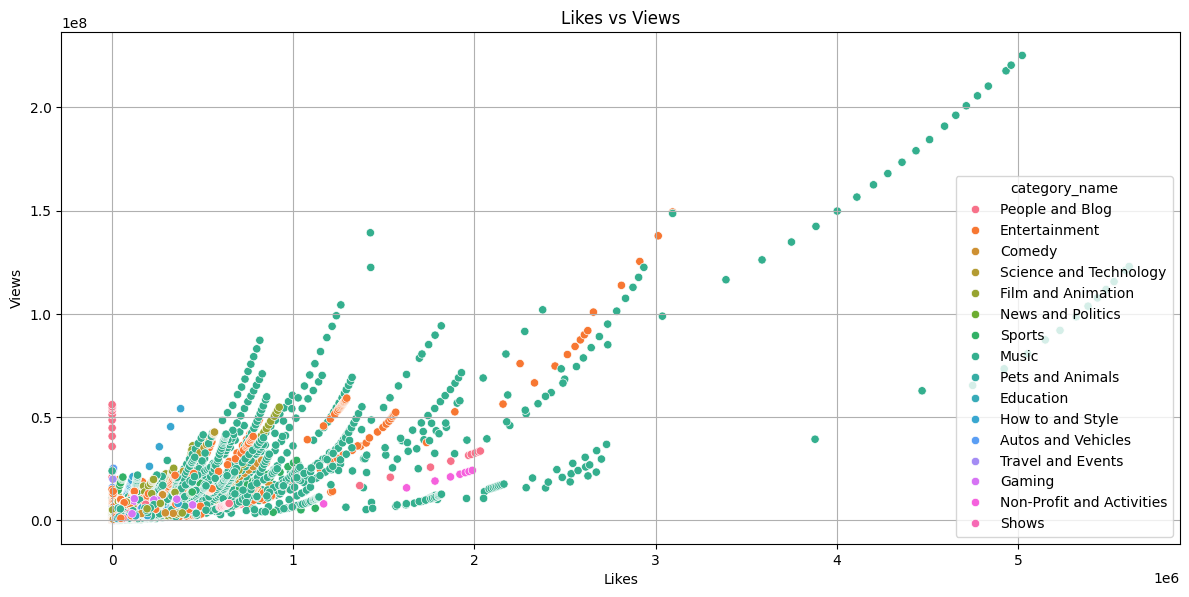

In [29]:
plt.figure(figsize = (12,6))
sns.scatterplot(df, x= 'likes', y = 'views', hue = 'category_name')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.grid(True)
plt.tight_layout()
plt.title('Likes vs Views')
plt.show()

In [30]:
co_relation = df['views'].corr(df['likes'])
co_relation

0.8491785476230503